In [1]:
import numpy as np
from ian.ian import *
from ian.utils import *
from ian.dset_utils import *
from ian.embed_utils import *
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
%matplotlib inline

plt.rcParams['figure.figsize']  = (6.0, 4.0)
plt.rcParams['figure.dpi'] = 72.0

## Create dataset

In [2]:
### Sample points uniformly at random from a 5-d cylinder (S^4 x R^1) or radius 1 and length 3 in R^6  

np.random.seed(1)


d = 5 #ambient space for the 4-sphere
length = 3 #cylinder length along its main axis
n = 7 #sets the sampling density

# sample using Muller method
# (e.g., see http://extremelearning.com.au/how-to-generate-uniformly-random-points-on-n-spheres-and-n-balls/)
u = np.random.normal(0, 1, (n**d,d))  # an array of d normally distributed random variables
norm = np.linalg.norm(u,axis=1,keepdims=1)
X = u/norm #all pts become unit-norm (unit radius sphere)

#sample positions along cylinder length in R^1, adding an extra dimension
X = np.concatenate([np.random.random(n**d)[:,None]*length,X],axis=1)
X -= X.mean(0)
N = X.shape[0]

#subsample: using half the total points, for speed
frac = .5 #fraction to use
subs = np.random.choice(range(N),int(N*frac),False)
X = X[subs]
N = X.shape[0]
print(X.shape)

(8403, 6)


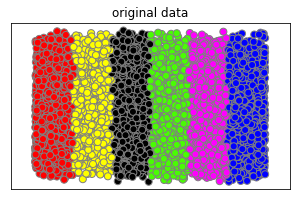

In [3]:
### setup color labels

red = tuple([1,0,0,1])
yellow = tuple([1,1,0,1])
black = tuple([0,0,0,1])
green = tuple([73/255,252/255,3/255])
magenta = tuple([1,0,1,1])
blue = tuple([0,0,1,1])

clrs_to_use = [red,yellow,black,green,magenta,blue]
nclrs = len(clrs_to_use)

clr_thickness = X[:,0].ptp()/nclrs
h0 = X[:,0].min()
clbls = np.zeros(N)
cclrs = np.zeros((N,3))
for clri in range(nclrs):
    mask = (X[:,0] >= h0 + clri*clr_thickness) & (X[:,0] <= h0 + (clri+1)*clr_thickness)
    clbls[mask] = clri
    cclrs[mask] = np.tile(clrs_to_use[clri][:3],(mask.sum(),1))

f,ax = subps(1,1,3,5)
plot2dScatter(X[:,[0,1]],cclrs,s=50,axLabels=False,alpha=1,edgecolors='gray',f_ax=(f,ax),axisEqual=True)
ax.set_title('original data')
plt.show()

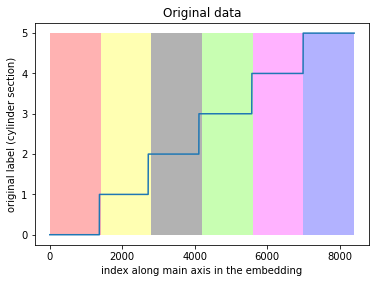

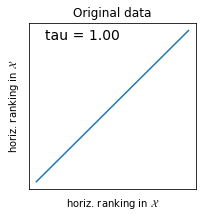

In [4]:
#plot labels of each point sorted by position along first principal component (main axis) in embedding
def showPositionalLabelMixing(y,titl=''):
    x_height_order = np.argsort(X[:,0])
    if y[x_height_order[0]] > y[x_height_order[-1]]:#check for flipped sign compared to original data
        y = -y
    height_order = np.argsort(y)
    n_pts_per_color = N//nclrs

    f, ax = subps(1,1,4,6)
    ax.plot(clbls[height_order])
    for clri in range(nclrs):
        start,end = clri*n_pts_per_color, (clri+1)*n_pts_per_color
        rect = plt.Rectangle((start,0), end-start, nclrs-1,
                                     facecolor=clrs_to_use[clri], alpha=0.3)
        ax.add_patch(rect)
    ax.set(xlabel='index along main axis in the embedding', ylabel='original label (cylinder section)', title=titl)
    plt.show()


# compute Kendall's tau to assess degree of mixing caused by the embedding algorithm
# for original data it is trivially 1.00 (100% match)

def plot_tau_stats(y, titl=''):
    x_height_order = np.argsort(X[:,0])
    if y[x_height_order[0]] > y[x_height_order[-1]]:#check for flipped sign compared to original data
        y = -y
    xmap = {v:k for k,v in enumerate(x_height_order)}
    y_height_order = [xmap[yi] for yi in np.argsort(y)]

    tau = sp.stats.kendalltau(np.arange(N),y_height_order)[0]
    
    f, ax = subps(1,1,3,3)
    ax.plot(y_height_order)
    ax.text(.1,.9,'tau = %.2f' % tau,size=14,transform=ax.transAxes)
    ax.set_xlabel(r'horiz. ranking in $\mathcal{X}$')
    ax.set_ylabel(r'horiz. ranking in $\mathcal{X}$')
    ax.set_title(titl)
    ax.set(xticks=[], yticks=[])
    plt.show()
    
    return tau

y = X[:,0]
algo_title = 'Original data'
showPositionalLabelMixing(y, algo_title)
tau = plot_tau_stats(y, algo_title)

## Compute IAN kernel

In [5]:
D2 = pwdists(X, sqdists=True) #square matrix of squared Euclidean distances
D1 = np.sqrt(D2)

### Iteration 1 done. (2.48 s) - pruned 2 edge(s)
### Iteration 2 done. (0.90 s) - pruned 2 edge(s)
### Iteration 3 done. (0.92 s) - pruned 2 edge(s)
### Iteration 4 done. (0.91 s) - pruned 2 edge(s)
### Iteration 5 done. (0.91 s) - pruned 1 edge(s)
### Iteration 6 done. (0.89 s) - pruned 1 edge(s)
### Iteration 7 done. (0.92 s) - pruned 1 edge(s)
### Iteration 8 done. (0.89 s) - pruned 1 edge(s)
### Iteration 9 done. (0.89 s) - pruned 1 edge(s)
### Iteration 10 done. (0.89 s) - pruned 1 edge(s)
### Iteration 11 done. (0.91 s) - pruned 1 edge(s)
### Iteration 12 done. (0.89 s) - pruned 1 edge(s)
### Iteration 13 done. (0.89 s) - pruned 1 edge(s)
### Iteration 14 done. (0.88 s) - pruned 1 edge(s)
### Iteration 15 done. (0.89 s) - pruned 1 edge(s)
### Iteration 16 done. (0.89 s) - pruned 1 edge(s)
### Iteration 17 done. (0.91 s) - pruned 1 edge(s)
### Iteration 18 done. (0.91 s) - pruned 1 edge(s)
### Iteration 19 done. (0.90 s) - pruned 1 edge(s)
### Iteration 20 done. (0.90 s) - pruned

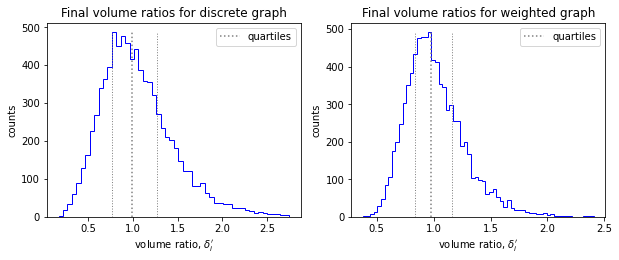

In [6]:
#using greedy approach for speed (took me about 42 seconds)
G, wG, optScales, disc_pts = IAN('exact-precomputed-sq', D2, obj='greedy')

# for higher accuracy, use linear program (took me about 11.5 minutes using the GUROBI solver),
# but resulting embeddings are very similar
# G, wG, optScales, disc_pts = IAN('exact-precomputed-sq', D2, obj='l1', solver='GUROBI')

In [7]:
#use average node degree as a reasonable number k of nearest neighbors to use with t-SNE (perplexity) and UMAP (n_neighbors)
avg_deg = int(G.toarray().sum(1).mean()) #parameter must be an integer
print('Average degree in unweighted graph:', avg_deg)

Average degree in unweighted graph: 27


## Compare embeddings using different algorithms

In [8]:
n_components = 2
rs = 0 #same random state to use across algorithms

### Diffusion maps

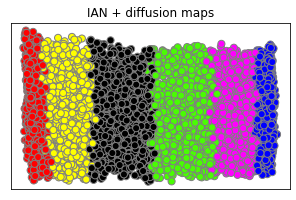

In [9]:
algo_title = 'IAN + diffusion maps'

diffmap_y, lams = diffusionMapFromK(wG, n_components)

#use PCA to align cylinder's main axis with first component, and allow for a fair comparison
dmPCs = PCA(2, random_state=rs).fit_transform(diffmap_y)
dmPCs[:,0] = -dmPCs[:,0] #(flipping in order to have red points on the left)
f,ax = subps(1,1,3,5)
plot2dScatter(dmPCs[:,[0,1]],cclrs,s=50,axLabels=False,edgecolors='gray',f_ax=(f,ax),axisEqual=False)
ax.set_title(algo_title)
plt.show()

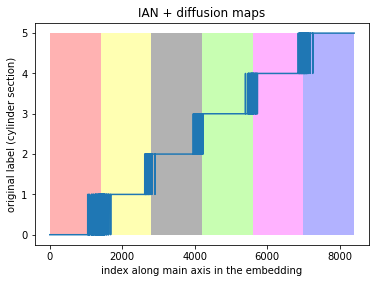

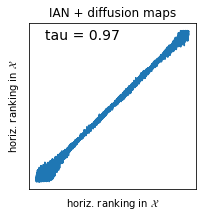

In [10]:
y = dmPCs[:,0]
showPositionalLabelMixing(y, algo_title)
tau = plot_tau_stats(y, algo_title)

### t-SNE

(note: the t-SNE implementation used here is included in the scikit-learn package)

In [11]:
algo_title = 't-SNE, k = %d' % avg_deg

knn = avg_deg

# 1 - use same initialization method used by umap (spectral embedding, i.e. Laplacian eigenmaps)
from sklearn.manifold import SpectralEmbedding
spec = SpectralEmbedding(n_components=n_components,affinity='precomputed',random_state=rs)
# (need to compute a kernel matrix first, using t-SNE's own sigmas) 
sigmas = computeTSNEsigmas(D2, knn) #use knn as perplexity
myK = computeTSNEkernel(D2, sigmas, False) #no need to normalize b/c will be done by eigenmaps
init = spec.fit_transform(myK)

# 2 - compute t-SNE embedding with the init above
tsne = TSNE(n_components=n_components, learning_rate='auto',metric='precomputed',
           init=init, perplexity=knn, random_state=rs, method="barnes_hut", verbose=1)
ty = tsne.fit_transform(D1)


[t-SNE] Computing 82 nearest neighbors...
[t-SNE] Indexed 8403 samples in 0.102s...
[t-SNE] Computed neighbors for 8403 samples in 1.027s...
[t-SNE] Computed conditional probabilities for sample 1000 / 8403
[t-SNE] Computed conditional probabilities for sample 2000 / 8403
[t-SNE] Computed conditional probabilities for sample 3000 / 8403
[t-SNE] Computed conditional probabilities for sample 4000 / 8403
[t-SNE] Computed conditional probabilities for sample 5000 / 8403
[t-SNE] Computed conditional probabilities for sample 6000 / 8403
[t-SNE] Computed conditional probabilities for sample 7000 / 8403
[t-SNE] Computed conditional probabilities for sample 8000 / 8403
[t-SNE] Computed conditional probabilities for sample 8403 / 8403
[t-SNE] Mean sigma: 0.270196
[t-SNE] KL divergence after 250 iterations with early exaggeration: 92.625244
[t-SNE] KL divergence after 1000 iterations: 2.264174


Text(0.5, 1.0, 't-SNE, k = 27')

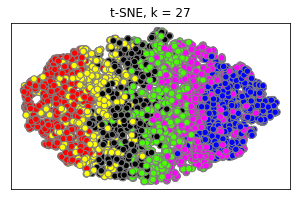

In [12]:
#use PCA to align main axis and allow for a fair comparison
tPCs = PCA(2, random_state=rs).fit_transform(ty)[:,:2]
f,ax = subps(1,1,3,5)
plot2dScatter(tPCs,cclrs,s=40,axLabels=False,edgecolors='gray',f_ax=(f,ax),axisEqual=False)
ax.set_title(algo_title)

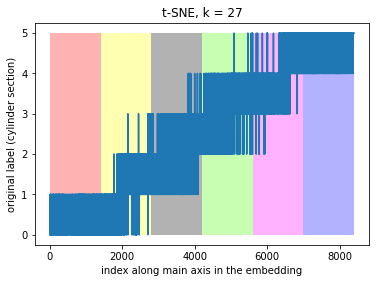

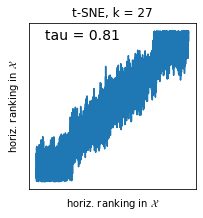

In [13]:
y = tPCs[:,0]
showPositionalLabelMixing(y, algo_title)
tau = plot_tau_stats(y, algo_title)

In [14]:
#### IAN + t-SNE
# use IAN's optimal scales in the t-SNE kernel
algo_title = 'IAN + t-SNE'

# 1 - use same initialization method used by umap (spectral embedding, i.e. Laplacian eigenmaps)
from sklearn.manifold import SpectralEmbedding
spec = SpectralEmbedding(n_components=n_components,affinity='precomputed',random_state=rs)
myK = computeTSNEkernel(D2, optScales, False) #no need to normalize b/c will be done by eigenmaps
init = spec.fit_transform(myK)

# 2 - compute t-SNE embedding with the init above
tsne = TSNE(n_components=n_components, learning_rate='auto', metric='precomputed', #setting perplexity here is irrelevant, won't be used
               init=init, random_state=rs, method="barnes_hut", verbose=1)
ity = my_tsne_fit_transform(tsne,D2.copy(),optScales)

[t-SNE] KL divergence after 250 iterations with early exaggeration: 59.812542
[t-SNE] KL divergence after 1000 iterations: 1.414593


Text(0.5, 1.0, 'IAN + t-SNE')

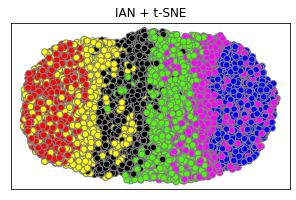

In [15]:
#use PCA to align main axis and allow for a fair comparison
itPCs = PCA(2, random_state=rs).fit_transform(ity)[:,:2]
f,ax = subps(1,1,3,5)
plot2dScatter(itPCs,cclrs,s=40,axLabels=False,edgecolors='gray',f_ax=(f,ax),axisEqual=False)
ax.set_title(algo_title)

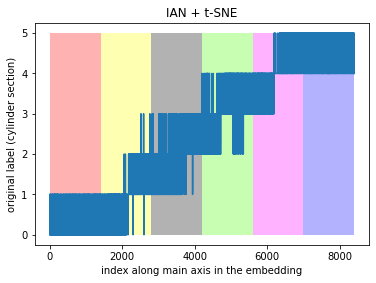

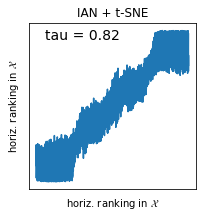

In [16]:
y = itPCs[:,0]
showPositionalLabelMixing(y, algo_title)
tau = plot_tau_stats(y, algo_title)

### UMAP

(note: UMAP is not a pre-requisite for the IAN package; you will need to install it independently in order to run the code below)

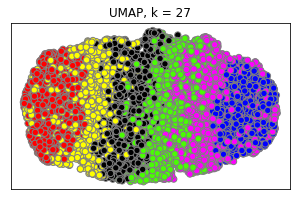

In [17]:
import umap #tested using umap-learn v0.5.3

algo_title = 'UMAP, k = %d' % avg_deg

fit = umap.UMAP(
    n_neighbors=avg_deg,
    n_components=n_components,
    random_state=rs,
)
uY = fit.fit_transform(X)

#use PCA to align cylinder's main axis with first component, and allow for a fair comparison
uPCs = PCA(2, random_state=rs).fit_transform(uY)[:,:2]
f,ax = subps(1,1,3,5)
plot2dScatter(uPCs,cclrs,s=40,axLabels=False,edgecolors='gray',f_ax=(f,ax),axisEqual=False)
ax.set_title(algo_title)
plt.show()

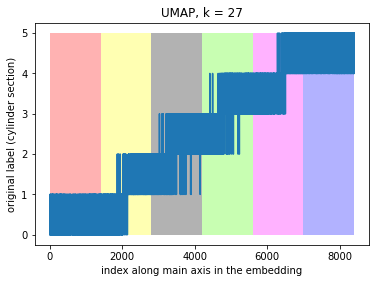

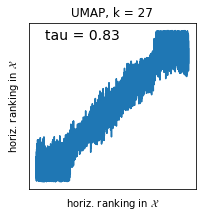

In [18]:
y = uPCs[:,0]
showPositionalLabelMixing(y, algo_title)
tau = plot_tau_stats(y, algo_title)

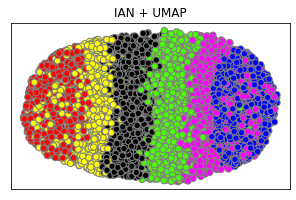

In [19]:
### IAN + UMAP

algo_title = 'IAN + UMAP'

#setting up a umap object
u = umap.UMAP(
    n_neighbors=avg_deg,
    n_components=n_components,
    transform_mode="graph", #this option tells umap not to compute the embedding just yet
    random_state=rs,
)
u.fit(X)

#run algorithm with our own weighted graph
myK = wG.toarray()
np.fill_diagonal(myK,0) #remove self-weights (not used by umap)
sparseK = sp.sparse.coo_matrix(myK) #convert into sparse COO format, required by umap


#now run umap's embedding algorithm directly, using the IAN weighted graph
from sklearn.utils import check_random_state, check_array
X_ = check_array(X.copy(), dtype=np.float32, accept_sparse="csr", order="C")

from umap.umap_ import simplicial_set_embedding
uY,_ = simplicial_set_embedding(X_, sparseK, #just pass along all internal attributes from the umap object create above
            u.n_components, u._initial_alpha, u._a, u._b, u.repulsion_strength, u.negative_sample_rate,
            u.n_epochs, u.init, check_random_state(u.random_state), u._input_distance_func, u._metric_kwds,
            u.densmap, u._densmap_kwds, u.output_dens, u._output_distance_func, u._output_metric_kwds,
            u.output_metric in ("euclidean", "l2"), check_random_state(u.random_state) is None, u.verbose, u.tqdm_kwds)

#use PCA to align main axis, allowing for a fair comparison
iuPCs = PCA(2,random_state=rs).fit_transform(uY)
iuPCs[:,0] = -iuPCs[:,0] #(flipping in order to have red points on the left)
f,ax = subps(1,1,3,5)
plot2dScatter(iuPCs[:,[0,1]],cclrs,s=40,axLabels=False,edgecolors='gray',f_ax=(f,ax),axisEqual=False)
ax.set_title(algo_title)
plt.show()

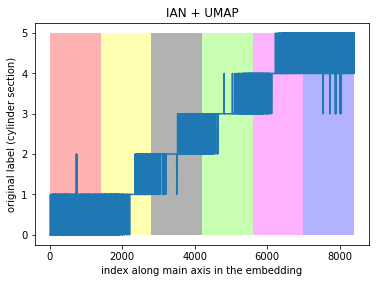

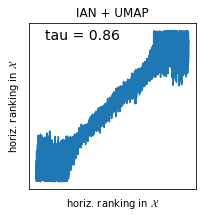

In [20]:
y = iuPCs[:,0]
showPositionalLabelMixing(y, algo_title)
tau = plot_tau_stats(y, algo_title)